# Python Deep Learning
# Ivan Vasilev, Daniel Slater, Gianmario Spacagna, Peter Roelants, Valentino Zocca
## Second Edition - Packt 
# Notes / Experiments with Python (and PyTorch, TensorFlow and Keras, among others)

In [1]:
# Imports and plot settings
PLT_TYPE = 'inline'  # restart Jupyter kernel before switching back to 'inline'

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

if PLT_TYPE.lower() == 'widget':
    %matplotlib widget
elif PLT_TYPE.lower() == 'inline':
    pass
elif PLT_TYPE.lower() == 'window':
    matplotlib.use('Qt5Agg')
    plt.ion()
else:
    raise SyntaxError("PLT_TYPE can either be 'inline', 'widget' or 'window")
    

## Chapter 1. Machine Learning - an Introduction
* AI can be defined, among other things, as a system that interact with its environment, using sensors and actuators.
* Machine learning can be seen as the way an AI tries and formulate appropriate answers as a function of the data available.
* Deep learning is a subfield of machine learning, mainly defined by the use of certain techniques/approaches. The most 
representative class of these methods are deep neural networks.

### Approaches to learning
* Supervised learning
* Unsupervised learning
* Reinforcement learning

### Supervised Learning
Supervised learning involves the use of previously-labeled data in order to learn its features, so they can then classify
new, similar but unlabeled data. This approaches needs **training data**. 

One way of thinking of supervised learning is as a function _f_ defined over a dataset, which comprises information organized
by **features**. 

```f: space of features -> classes = (discrete values or real values)``` 

We will use the ```MNIST``` dataset (Modified National Institute of Standard and Technology) to work on handwritten digits
recognition by means of either classification or regression approaches. In this case, we'll use images of 28x28 pixels of
size. **Our algorithm will use a 28x28 = 784-dimensional feature space to classify the digits**.

#### Linear and Logistic Regression
Regression algorithms are a type of supervised algos that uses features of the input data to predict a value, such as the
cost of a certain type of good, given a feature set. Regression tries to find the value of the parameters for the function
that best fits an input dataset.

In linear regression algos, the goal is to minimize the cost function (error of prediction from truth) by finding appropriate
values for the parameters of the function, over the input data that best approximates the target value. A popular example
is **mean square error** (MSE). A pseudo-code representation of this would be:
```
Given:
* a dataset comprising input/target pairs as (x[i], t[i]) for every i in range(len(dataset))
* a vector w containing random values of len(w) == len(features) == len(x[i])
For an arbitrarily large number of times, repeat:
    Err = 0  # initialize cost
    for every i in range(len(dataset))
        Err += (x[i] * w - t[i]) ** 2
    MSE = Err / len(dataset)
```

We iterate over the training data to compute the cost function to obtain the MSE, and then we use the gradient-descent
algorithm to update _w_ accordingly. This involves computing the derivatives of the cost function with respect of each
weight, in order to determine how the cost changes with respect of each weight. We'll see how this is remarkably similar
to the process used to train neural networks.

We can adapt the regression logic to a situation in which we want to reduce the outcome of our algorithm to a discrete,
categorical output (as opposed to a real-value output, such as the cost of a given good above). In this case we can use
**logistic regression**. It is imaginable as a probability between two certain possible outcomes, and the response label
is either one or the other possible outcome. To make this technique usable for classification problems, we need to introduce
a rule that determines the class based on the logistic function output (i.e. similar to a threshold). Boh.

#### Support Vector Machines
A support vector machine is a type of supervised machine learning algo used mainly for classification. It belongs
to the kernel method class of algos. An SVM tries to find a hyperplane separating the sample across its features.

#### Decision Trees
A decision tree takes on classification problems by representing the whole computation and decision process as a tree.
It is composed of decision nodes, in charge of testing specific attributes of the data, and leaf nodes, indicating the 
value of the target attribute. To begin a classification, we start at the root and navigate down the nodes until we 
reach a leaf. The _Iris flower dataset_ can be used to show this algorithm. We can create a decision tree to decide which
species a certain flower belongs to:
```
          Petal Length < 2.5
                  |
    *Iris Setosa* - Petal Width < 1.8
                           |                 
        Petal Length < 4.9 - *Iris Virginica*
                  |
*Iris Versicolor* - *Iris Virginica*
```
#### Naive Bayes
No, I'll come here later I think.

### Unsupervised Learning
This class involves methods that try to come to its own conclusions about the data without labels/ground truth. With
 **cluster analysis**, we try finding "natural" clustering behaviors in the data, given certain features, to derive
the different classes possibly underlying the data (_k-means_ are an example of this subclass).

A different approach, **recurrent neural networks**, make use of the "context" of data (i.e., in natural language processing,
each word in a phrase is submitted, together with its neighboring words - the context - to simple neural nets). 

With **generative adversarial networks (GANs)**, we first train a network with large dataset, and then we use the network
to produce new examples similar to the training dataset. They can be used to colorize black and white photographs, alter
facial expressions in images and more.

### Reinforcement Learning
This third class involves having an algorithm try to maximize certain rewards obtained by interacting with an environment.
The _agent_ takes an action that changes the state of the environment. It then uses the new state and the reward to 
determine its next action. It has to do with using previous, progressively accumulated experience to improve in the task,
as opposed to just using ground truths to derive rules. 

#### Q-learning
Q-learning is an off-policy temporal-difference reinforcement learning algorithm. A suitable example is imagining trying
to create an ML agent that plays and tries to win a chess game. For any given time, the state of the chess game
is represented by the board configuration (i.e. the location of the pieces on the board). The agent needs then to take an
action, a, by moving a piece, thus changing the state of the board. The problem may be represented as a graph. Each
vertex represents a given board configuration, while each edge is a move that brings the state from one configuration of
the pieces (node) to another. By making a move, the agent moves from one edge to another, and uses a _Q-table_ to decide
which move to take. A Q-table has one row for each different board configuration (state, ```s```), and a column for each
possible action that the agent can take (a move, ```a```). A given cell of the Q-table, ```q(s, a)```, contains the 
potential total reward obtained for the remainder of the game if the agent takes an action ```a``` from the current state
```s``` and it's called **Q-value**. The Q-table is first initialized with arbitrary values, and it's then filled as the
game progresses and finishes. The Q-values are used to determine the "attractiveness" of a certain move in a certain state
in the attempt to ultimately win the game. It allows the agent to seek high potential rewards by exploring.

### Components of an ML solution
* Learner
* Training data
* Representation (how we express data in terms of selected features to provide the learner with)
* Goal (the reason to learn from the data, the aim)
* Target (what is being learned as well as the final output)

#### Creation of the test case
* Training set (what we use in training phase)
* Validation set (to evaluate the accuracy of the algo using unknown data. Sometimes we can fine-tune the model after
feedback from using the validation set, and it is used to determine when to stop learning)
* Test set (to use only **once** after training, to prevent introducing bias when over-tuning the data in successive
attempts with the same data points)

...

### Introduction to PyTorch
Finally!!!

In [2]:
# Download and parse a CSV file from the Internet, containing 150 rows of the IRIS flower dataset
my_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                         names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
# Recode the categorical column 'species' from strings to codes ([0, 1, 2]) for the 3 flowers
my_dataset['species'] = pd.Categorical(my_dataset['species']).codes
# Shuffle the order of the rows of the dataset
my_dataset = my_dataset.sample(frac=1, random_state=1234)

print(len(my_dataset.values))
train_input = my_dataset.values[:120, :4]  # The majority of the rows will be training dataset, exclude the column containing the ground truth
train_target = my_dataset.values[:120, 4]  # Store the ground truth only for 120 of the rows, like above

test_input = my_dataset.values[120:, :4]  # Same for the test dataset, only using the last 30 rows for this
test_target = my_dataset.values[120:, 4]

torch.manual_seed(1234)  # reproducibility

hidden_units = 5  # One hidden layer containing 5 neurons

# Feed-forward network, 1 hidden layer (5 units), rectified linear activation function and 1 output layer with 3 units
net = torch.nn.Sequential(
    torch.nn.Linear(4, hidden_units),  # first layer, 4 neurons, one per variable of interest (sepal_length, sepal_width, etc.)
    torch.nn.ReLU(),  # rectified linear activation function
    torch.nn.Linear(hidden_units, 3)  # output layer, 3 units (one per possible flower type)
)

# Optimizer
my_crit = torch.nn.CrossEntropyLoss()  # cross entropy loss as loss function
my_optim = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)  # stochastic gradient descent as optimizer

# training loop
epochs = 50

for epoch in range(epochs):
    # noinspection PyArgumentList
    inputs = torch.autograd.Variable(torch.Tensor(train_input).float())
    # noinspection PyArgumentList
    targets = torch.autograd.Variable(torch.Tensor(train_target).long())
    
    my_optim.zero_grad()  # Start with fresh zeroed gradients for the current epoch
    out = net(inputs)  # submit the inputs to the net
    loss = my_crit(out, targets)  # how far were we from the truth?
    loss.backward()  # Compute contributions of each weight
    my_optim.step()  # attempt improvement
    
    if epoch == 0 or (epoch + 1) % 10 == 0:
        print('Epoch %d Loss: %.4f' % (epoch + 1, loss.item()))
        
# noinspection PyArgumentList
inputs = torch.autograd.Variable(torch.Tensor(test_input).float())
# noinspection PyArgumentList
targets = torch.autograd.Variable(torch.Tensor(test_target).long())

my_optim.zero_grad()
out = net(inputs)
_, predicted = torch.max(out.data, 1)

# noinspection PyUnresolvedReferences
error_count = test_target.size - np.count_nonzero((targets == predicted).numpy())
# noinspection PyTypeChecker
print('Errors: %d, Accuracy: %d%%' % (error_count, 100 * torch.sum(targets == predicted) / test_target.size))

150
Epoch 1 Loss: 1.2181
Epoch 10 Loss: 0.6745
Epoch 20 Loss: 0.2447
Epoch 30 Loss: 0.1397
Epoch 40 Loss: 0.1001
Epoch 50 Loss: 0.0855
Errors: 0, Accuracy: 100%


It worked perfectly.
## 2. Neural Networks
### Intro to neural networks
* Information occurs mathematically, over simple elements called **neurons**
* Neurons are connected and exchange signals (i.e. numbers) between each other through links
* Each link has a **weight**, determining how information is processed as it passes through
* Each neuron has an internal state, determined by all the incoming links
* Each neuron has an **activation function** which determines the output signal as a function of its state

The **architecture** of a neural network defines what type of connectivity the units have (i.e. feedforward, recurrent, multi-
or single-layered, etc.), the number of layers and of neurons within each layer.
The **learning** describes how the network adapt and improves; common tools are _gradient descent_ and _backpropagation_.

### Intro to neurons
Mathematically, a neuron is defined as:
```
y = f(sum(x[:] * w[:]) + b)
```
where ```x``` represents the inputs, and ```w``` represents the weights. ```b``` represents the _bias_ and its input is 
always 1.

### Intro to layers
In a neural network, the input layer represents the dataset and the initial conditions: if the net deals with grayscale 
images, the units in the first layer will represent the pixel intensity. The output layer can have more than one neuron:
usually we find one unit per possible answer/class.

### Multi-layer networks
Single layer networks can only classify linearly separable classes, but by adding **hidden layers** we can surpass this
limitation. Another condition for multi-layer network to classify linearly-inseparable classes is that their **activation
function must not be linear**.

### Different types of activation function
The most common activation functions are the following:
* ```f(a) = a``` - **identity function**
* ```f(a) = [1 if a >= 0, otherwise 0]``` - **threshold activity function**
* ```f(a) = 1 / (1 + exp(-a))``` - **logistic function**, or **logistic sigmoid** (0, 1)
* ```f(a) = 2 / (1 + exp(-a)) = (1 - exp(-a)) / (1 + exp(-a))``` - **bipolar sigmoid** (-1, 1)
* ```f(a) = (exp(a)-exp(-a)) / (exp(a) + exp(-a)) = (1 - exp(-2 * a)) / (1 + exp(-2 * a))``` - **hyperbolic tangent**, tanh (-1, 1)
* ``` f(a) = [a if a >= 0, otherwise 0]``` - **rectified linear unit**, **ReLU** (0, Inf)

### Example
Let's build a very simple net, one hidden layer with two neurons, and single input and output neurons. It will support
the idea that under the _Universal Approximation Theorem_ any continuous function on compact subsets of Rn can be 
approximated by a neural network with at least one hidden layer.

The step function starts at -5.0 and ends at 5.0


C:\Users\Luca\Anaconda3\envs\py37ML\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
C:\Users\Luca\Anaconda3\envs\py37ML\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


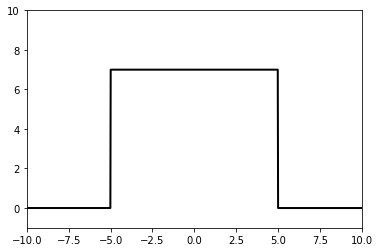

In [3]:
weight_value = 1000

bias_value_1 = 5000

bias_value_2 = -5000

plt.axis([-10, 10, -1, 10])

print("The step function starts at {0} and ends at {1}".format(-bias_value_1 / weight_value, -bias_value_2 / weight_value))

inputs = np.arange(-10, 10, 0.01)
outputs = list()

for x in inputs:
    y1 = 1.0 / (1.0 + np.exp(-weight_value * x - bias_value_1))
    y2 = 1.0 / (1.0 + np.exp(-weight_value * x - bias_value_2))
    
    w = 7
    
    y = y1 * w - y2 * w
    
    outputs.append(y)
plt.plot(inputs, outputs, lw=2, color='black')
plt.show(block=False)

##### Pyplot backends and settings
Importing ```matplotlib``` and calling the method ```matplotlib.use()``` allows to change pyplot backend.
* **default** DON'T KNOW 
* **'WebAgg'** opens a new browser tab, interactive
* **'Qt5Agg'** new window, interactive (use ```plt.show(block=False)```!!!)

Beware: after setting the backend to ```Qt5Agg``` (or any interactive one), to have inline plots in the notebook again
the Jupyter kernel must be restarted before disabling the ```matplotlib.use()``` call.

### Training neural networks
We will now explore how the training procedure works on a very simple, 1-layer network using an algorithm called
**gradient descent**, then extending the example to a deep forward network using **backpropagation**. During training, we
use these tools with the aim of decreasing the network prediction error as much as possible. It is a minima finding problem.

### Linear regression
In vector notation, the output of a linear regression is a single value, ```y```, and is equal to the dot product of the
input values ```x``` and the weights ```w```. Linear regression **is a special case of a neural network** with a single
unit and identity activation function. 

Gradient descent works as follows:
1. Initialize the weights ```w``` with random values
2. Repeat:
    * Compute the MSE for all the samples of the training set (```(sum(x * w - t) ^ 2) / n```)
    * Compute the derivative of the MSE for each weight, update the weights to minimize it, until MSE is below threshold
    
The learning rate defines the ratio by which the weight adjusts as new data arrives. 

### Logistic regression
Same as above, but with a different activation function (logistic sigmoid activation).

### Backpropagation
For a 1-layer network, updating the weights using gradient descent is straightforward since we can compare the output
with the target and update the weights. In multi-layer networks, we could only do this for the weights that connect
the the final hidden layer to the output layer, because we don't have target values for the intermediate representations.

In this case, what we do is calculate the error in the final hidden layer and estimate what it would have been in the 
previous layer. Then, we propagate the error back from the last layer to the first.

### Code example: net for the XOR function
XOR is a linearly inseparable function, so we will use it to show a net with a hidden layer. 

In [50]:
from matplotlib.colors import ListedColormap

# noinspection PyShadowingNames
def tanh(x: float):
    return (1.0 - np.exp(-2 * x)) / (1.0 + np.exp(-2 * x))

# noinspection PyShadowingNames
def tanh_deriv(x: float):
    return (1 + tanh(x)) * (1 - tanh(x))

# noinspection PyPep8Naming,PyShadowingNames,PyMethodMayBeStatic
class NeuralNetwork:
    """
    NeuralNetwork represents a simple feedforward network, consisting of an architecture represented by an array whose 
    length defines the number of layers and the elements the number of units in each layer. Implements methods to fit the
    data, to make a prediction and to plot the results.
    """
    def __init__(self, net_arch: list):
        """
        :param net_arch: Architecture of the net, as an array of number of units, with each element representing a layer
        :type net_arch: list 
        :rtype: object
        """
        self.activation_func = tanh  # The function used by each neuron to determine its output as a function of its inputs
        self.activation_deriv = tanh_deriv  # Derivative of the activation function, used for gradient descent during backpropagation
        self.layers = len(net_arch)  # number of layers
        self.steps_per_epoch = 1000
        self.net_arch = net_arch
        
        # Init weights to random values. This will be an array containing an array for each layer but the last (which 
        # doesn't connect to anything, strictly speaking, it just outputs the answer; each inner array contains
        # one value per connection per neuron (with every layer including a bias unit of constant input 1, except for 
        # the last layer), i.e. if we have an architecture of [2, 2, 1], self.weights will be an array of length 2 containing
        # a first array of length 6 (2 units connected with 2 units = 4 synapses + 1 bias connected with 2 units in first
        # layer = 2 == 6) and a second array of length 3 (2 units connected with 1 unit = 2 + 1 bias connected with 1 unit
        # in last layer = 1 == 3). 
        self.weights = []
        for layer in range(len(net_arch) - 1):
            w = 2 * np.random.rand(net_arch[layer] + 1, net_arch[layer + 1]) - 1
            self.weights.append(w)
            
    def fit(self, data, labels, learning_rate: float = 0.1, epochs: int = 10, verbose: bool = False):
        # bias units to the input layer. The input layer contains the input submitted to the net i.e. a pair of bools for
        # our XOR() learning. We add the bias unit, which is just a leading 1.  
        ones = np.ones((1, data.shape[0]))
        Z = np.concatenate((ones.T, data), axis=1)
        if verbose:
            print("Z:\n{}".format(Z))
        training = epochs * self.steps_per_epoch
        if verbose:
            print('total training steps: {}'.format(training))
            print("data:\n{}\nshape:{}".format(data, data.shape))
            print("labels:\n{}\n".format(labels))
            print("bias unit(s) being added, data shape: {}".format(data.shape[0]))
        for k in range(training):
            if k % self.steps_per_epoch == 0:
                print('\n\nepochs: {}'.format(k / self.steps_per_epoch))
                for s in data:
                    print(s, nn.predict(s))
            
            # For the current iteration, select a random input pair to give to the net.
            sample = np.random.randint(data.shape[0])
            y = [Z[sample]]
            if k % self.steps_per_epoch == 0 and verbose:
                print("y before training of epoch {}:\n{}".format(k / self.steps_per_epoch, y))
            
            # Beginning with the input layer, calculate the activation for each unit. This means that we first iterate
            # through the layers (except for the final, which does not need a bias unit input), we calculate the activation
            # value for each neuron given the appropriate weight, we then use the activation function and "transmit" the 
            # information by storing it. This is obtained by computing the dot product between the weights and the units
            # values, then applying the activation function to the resulting vector.
            for i in range(len(self.weights) - 1):
                activation = np.dot(y[i], self.weights[i])
                if k % self.steps_per_epoch == 0 and verbose:
                    print(self.weights[i].shape, y[i].shape)
                activation_f = self.activation_func(activation)
                activation_f = np.concatenate((np.ones(1), np.array(activation_f)))
                y.append(activation_f)
                if k % self.steps_per_epoch == 0 and verbose:
                    print("values transmitted by layer {}:\n{}".format(i, activation_f))
                
            # Same thing for the final layer, just without adding a bias unit to it.
            activation = np.dot(y[-1], self.weights[-1])
            activation_f = self.activation_func(activation)
            y.append(activation_f)
            if k % self.steps_per_epoch == 0 and verbose:
                print("y after last layer:\n{}".format(y))
            
            # We start from the last layer (output) and calculate the error of the net's response from the correct answer
            error = labels[sample] - y[-1]
            if k % self.steps_per_epoch == 0 and verbose:
                print("net response error: {}".format(error))
            delta_vec = [error * self.activation_deriv(y[-1])]
                         
            # We go backwards towards the first layer, and descend the gradient by using the derivative of the activation
            # function to compute the "relative contribution" of each weight in giving the final answer
            for i in range(self.layers - 2, 0, -1):
                if k % self.steps_per_epoch == 0 and verbose:
                    print(i)
                error = delta_vec[-1].dot(self.weights[i][1:].T)
                error = error * self.activation_deriv(y[i][1:])
                delta_vec.append(error)
                
            delta_vec.reverse()
            if k % self.steps_per_epoch == 0 and verbose:
                print("delta vector after epoch {}:\n{}".format(k / self.steps_per_epoch, delta_vec))
                print("net answer: {}, error + answer = {}".format(y[-1], labels[sample]))
            
            # We then go from first to last layer and update the weights given our gradient and our learning rate
            for i in range(len(self.weights)):
                layer = y[i].reshape(1, nn.net_arch[i] + 1)
                delta = delta_vec[i].reshape(1, nn.net_arch[i + 1])
                if k % self.steps_per_epoch == 0 and verbose:
                    print("layer: {}".format(layer))
                    print("delta for layer {}: {}".format(i, delta))
                    print("weights for layer {}:\n{}".format(i, self.weights[i]))
                self.weights[i] += learning_rate * layer.T.dot(delta)
            
            if k % self.steps_per_epoch == 0 and verbose:
                print("new weights after epoch {}:\n{}".format(k / self.steps_per_epoch, self.weights))
                
    def predict(self, x):
        val = np.concatenate((np.ones(1).T, np.array(x)))
        for i in range(0, len(self.weights)):
            val = self.activation_func(np.dot(val, self.weights[i]))
            val = np.concatenate((np.ones(1).T, np.array(val)))
            
        return val[1]
        
    def plot_decision_regions(self, X, y, points=200):
        markers = ('o', '^')
        colors = ('red', 'blue')
        cmap = ListedColormap(colors)
        
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        resolution = max(x1_max - x1_min, x2_max - x2_min) / float(points)
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        my_input = np.array([xx1.ravel(), xx2.ravel()]).T
        Z = np.empty(0)
        for i in range(my_input.shape[0]):
            val = nn.predict(np.array(my_input[i]))
            if val < 0.5:
                val = 0
            if val >= 0.5:
                val = 1
            Z = np.append(Z, val)
        Z = Z.reshape(xx1.shape)
        
        plt.pcolormesh(xx1, xx2, Z, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        classes = ["False", "True"]
        
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=1.0, c=colors[idx], edgecolors='black', 
                        marker=markers[idx], s=80, label=classes[idx])
        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
        plt.legend(loc='upper left')
        plt.show()

Z:
[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]
total training steps: 10000
data:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
shape:(4, 2)
labels:
[0 1 1 0]

bias unit(s) being added, data shape: 4


epochs: 0.0
[0 0] -0.5798249476496324
[0 1] -0.3243739160609326
[1 0] -0.365009704539086
[1 1] -0.19670589979422728
y before training of epoch 0.0:
[array([1., 1., 0.])]
(3, 2) (3,)
values transmitted by layer 0:
[ 1.         -0.8228976   0.04528314]
y after last layer:
[array([1., 1., 0.]), array([ 1.        , -0.8228976 ,  0.04528314]), array([-0.3650097])]
net response error: [1.3650097]
1
delta vector after epoch 0.0:
[array([-0.20064317, -0.24687155]), array([1.19815981])]
net answer: [-0.3650097], error + answer = 1
layer: [[1. 1. 0.]]
delta for layer 0: [[-0.20064317 -0.24687155]]
weights for layer 0:
[[-0.16595599  0.44064899]
 [-0.99977125 -0.39533485]
 [-0.70648822 -0.81532281]]
layer: [[ 1.         -0.8228976   0.04528314]]
delta for layer 1: [[1.19815981]]
weights for layer 1:
[[-0.627479

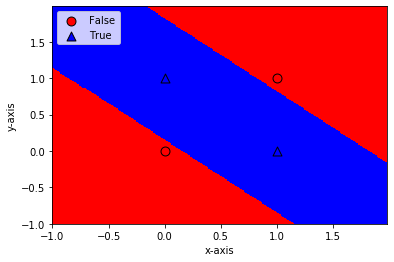

In [53]:
# Example 1, verbose
np.random.seed(1)
nn = NeuralNetwork([2, 2, 1])

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

nn.fit(X, y, epochs=10, verbose=True)

print("final prediction")
for s in X:
    print(s, nn.predict(s))
    
nn.plot_decision_regions(X, y)



epochs: 0.0
[0 0] -0.9333762396355102
[0 1] -0.8927209844748133
[1 0] -0.9039355440054777
[1 1] -0.8384376643400449


epochs: 1.0
[0 0] -0.011541934476393042
[0 1] 0.8436336213348098
[1 0] 0.8833500834329784
[1 1] -0.0037336392896542177


epochs: 2.0
[0 0] 0.010795713690083857
[0 1] 0.9609143057380306
[1 0] 0.976579932482217
[1 1] -0.0028805474264308544


epochs: 3.0
[0 0] 0.009448081952927203
[0 1] 0.9817054754607706
[1 0] 0.9872528150582088
[1 1] 0.014914379359901914


epochs: 4.0
[0 0] 0.01435767288754408
[0 1] 0.9883597591467227
[1 0] 0.9907922160162363
[1 1] 0.0027622027631696534


epochs: 5.0
[0 0] 0.003805335841626724
[0 1] 0.9909823498096653
[1 0] 0.9942201094620315
[1 1] 0.024947636331815317


epochs: 6.0
[0 0] 0.00012614180619855545
[0 1] 0.9932372494982287
[1 0] 0.9948320303441583
[1 1] 0.0014799542962555007


epochs: 7.0
[0 0] 0.00611660822846499
[0 1] 0.9943513752251579
[1 0] 0.9961747680121966
[1 1] 0.01085689986063549


epochs: 8.0
[0 0] -2.7042834632151023e-05
[0 1] 0

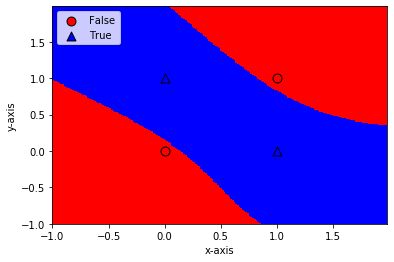

In [54]:
# Example 2, larger hidden neuron to show how the decision boundaries change
np.random.seed(1)
nn = NeuralNetwork([2, 6, 1])

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

nn.fit(X, y, epochs=10, verbose=False)

print("final prediction")
for s in X:
    print(s, nn.predict(s))
    
nn.plot_decision_regions(X, y)